In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
housing_raw = pd.read_csv(
    'Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=['period_begin','period_end'],
    dtype={
        'total_homes_sold':'Int32',
        'region_name':'category'
    })
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [22]:
# loc: seleciona só o que contem CA
# assign: remove o estado + 'county' da str
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11])

In [23]:
ca_housing_pivot = ca_housing.pivot_table(
    index='period_begin',
    columns='region_name',
    values='inventory'
).assign(
    CA_average = lambda x: x.mean(axis=1)
).loc[:,['Los Angeles','San Diego','San Francisco','CA_average']]

In [24]:
ca_housing_pivot.head()

region_name,Los Angeles,San Diego,San Francisco,CA_average
period_begin,,,,
2017-01-02,15492.0,5468.0,626.0,1259.851852
2017-01-09,15605.0,5493.0,652.0,1268.888889
2017-01-16,15724.0,5520.0,673.0,1278.481481
2017-01-23,15834.0,5546.0,685.0,1287.129630
2017-01-30,15972.0,5581.0,697.0,1298.148148


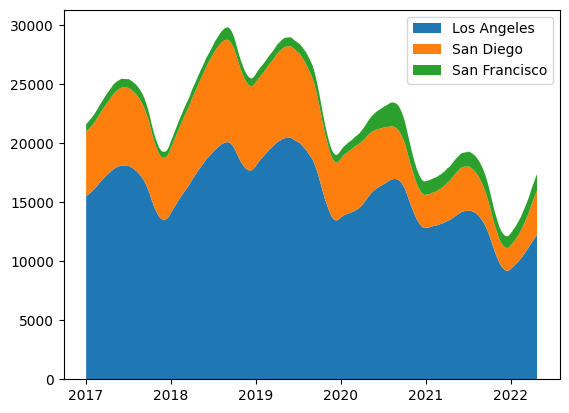

In [25]:
fig, ax = plt.subplots()

ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot['Los Angeles'],
    ca_housing_pivot['San Diego'],
    ca_housing_pivot['San Francisco'],
    )

ax.legend(ca_housing_pivot.columns)

In [27]:
housing_raw = pd.read_csv(
    'Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates=['period_begin','period_end'],
    dtype={
        'total_homes_sold':'Int32',
        'region_name':'category'
    })
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [32]:
ca_housing = (housing_raw
    .loc[(housing_raw['region_name'].str.contains('CA'))]
    .assign(region_name = housing_raw['region_name'].str[0:-11])
    .set_index('period_begin').sort_index()
    )

In [33]:
sd_dual = (
    ca_housing.loc[ca_housing['region_name'] == 'San Diego',['inventory','median_active_list_price']]
)
sd_dual

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0
...,...,...
2022-03-28,3120.0,901649.6
2022-04-04,3291.0,902899.8
2022-04-11,3449.0,902899.8


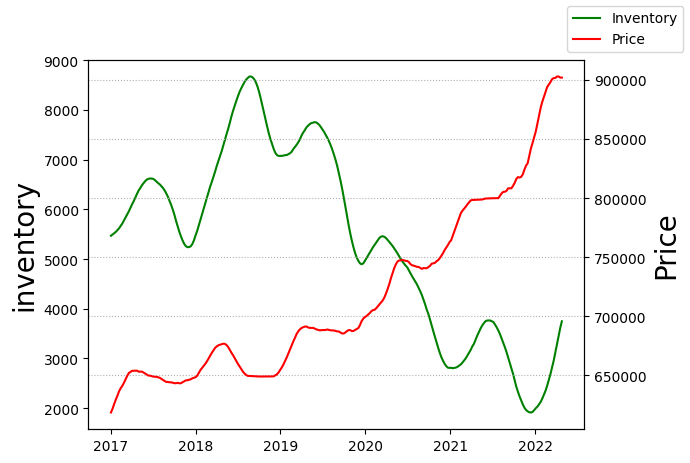

In [54]:
fig, ax = plt.subplots()

ax.plot(
    sd_dual['inventory'],
    c='green'
    )
ax.set_ylabel('inventory', fontsize=20)

ax2 = ax.twinx()
ax2.plot(
    sd_dual['median_active_list_price'],
    c='red'
    )
ax2.set_ylabel('Price', fontsize=20)


fig.legend(
    ['Inventory','Price'],
    )
plt.grid(ls=':')
